# Credit Card Fraud - SVM Classification

Welcome to my notebook! Let's see what SVM classification is all about. 

TOC:
1. [Problem Framing](#t1.)
2. [Assess Data Quality & Missing Values](#t2.)
3. [Exploratory Data Analysis](#t3.)
4. [Feature Engineering](#t4.)
5. [Model Selection](#t5.)
6. [Tessting the model](#t6.)
7. [Presenting the Solution](#t7.)

<a id="t1."></a>
## 1. Problem Framing

### Problem Definition

It is important that credit card companies are able to recognize fraudulent credit card transactions so that customers are not charged for items that they did not purchase.

This is a standard binary classification task. The datasets contains transactions made by credit cards in September 2013 by european cardholders. It contains only numerical input variables which are the result of a PCA transformation.

This dataset presents transactions that occurred in two days, where we have 492 frauds out of 284,807 transactions. The dataset is highly unbalanced, the positive class (frauds) account for 0.172% of all transactions.

### The Data

The datasets contains transactions made by credit cards in September 2013 by european cardholders. It contains only numerical input variables which are the result of a PCA transformation.

This dataset presents transactions that occurred in two days, where we have 492 frauds out of 284,807 transactions. The dataset is highly unbalanced, the positive class (frauds) account for 0.172% of all transactions.

The dataset has been collected and analysed during a research collaboration of Worldline and the Machine Learning Group (http://mlg.ulb.ac.be) of ULB (Université Libre de Bruxelles) on big data mining and fraud detection.

More details on current and past projects on related topics are available on https://www.researchgate.net/project/Fraud-detection-5 and the page of the DefeatFraud project

### Preparing the tools

In [1]:
#basic libraries
import numpy as np
import pandas as pd

#seed the project
np.random.seed(64)

#warning handle
import warnings
warnings.filterwarnings("ignore")


print("Set up completed")

Set up completed


### Load the Data

In [2]:
# Import train and test data
data = pd.read_csv('data/creditcard.csv')

In [3]:
data.head()

,Time,V1,V2,V3,V4,V5,V6,V7,V8,V9,...,V21,V22,V23,V24,V25,V26,V27,V28,Amount,Class
0,0.0,-1.359807,-0.072781,2.536347,1.378155,-0.338321,0.462388,0.239599,0.098698,0.363787,...,-0.018307,0.277838,-0.110474,0.066928,0.128539,-0.189115,0.133558,-0.021053,149.62,0
1,0.0,1.191857,0.266151,0.166480,0.448154,0.060018,-0.082361,-0.078803,0.085102,-0.255425,...,-0.225775,-0.638672,0.101288,-0.339846,0.167170,0.125895,-0.008983,0.014724,2.69,0
2,1.0,-1.358354,-1.340163,1.773209,0.379780,-0.503198,1.800499,0.791461,0.247676,-1.514654,...,0.247998,0.771679,0.909412,-0.689281,-0.327642,-0.139097,-0.055353,-0.059752,378.66,0
3,1.0,-0.966272,-0.185226,1.792993,-0.863291,-0.010309,1.247203,0.237609,0.377436,-1.387024,...,-0.108300,0.005274,-0.190321,-1.175575,0.647376,-0.221929,0.062723,0.061458,123.50,0
4,2.0,-1.158233,0.877737,1.548718,0.403034,-0.407193,0.095921,0.592941,-0.270533,0.817739,...,-0.009431,0.798278,-0.137458,0.141267,-0.206010,0.502292,0.219422,0.215153,69.99,0


We can see that none of the features have a title or description, this was done to preserve privacy of the credit cards owners. We'll have to work around that.

In [4]:
print (f"DF has {data.shape[0]} rows and {data.shape[1]} columns")

DF has 284807 rows and 31 columns


<a id="t2."></a>
## 2. Data Quality & Missing Values Assessment

### Data Types

We can see our dataset consist on different types of data.

In [5]:
# Different data types in the dataset
data.dtypes

Time      float64
V1        float64
V2        float64
V3        float64
V4        float64
V5        float64
V6        float64
V7        float64
V8        float64
V9        float64
V10       float64
V11       float64
V12       float64
V13       float64
V14       float64
V15       float64
V16       float64
V17       float64
V18       float64
V19       float64
V20       float64
V21       float64
V22       float64
V23       float64
V24       float64
V25       float64
V26       float64
V27       float64
V28       float64
Amount    float64
Class       int64
dtype: object

We can see that all our features are in fact numerical, floats, to be exact, great.

### Missing Values

Most ML algorithms have a hard time working with missing values, so let's see what our situation is. 

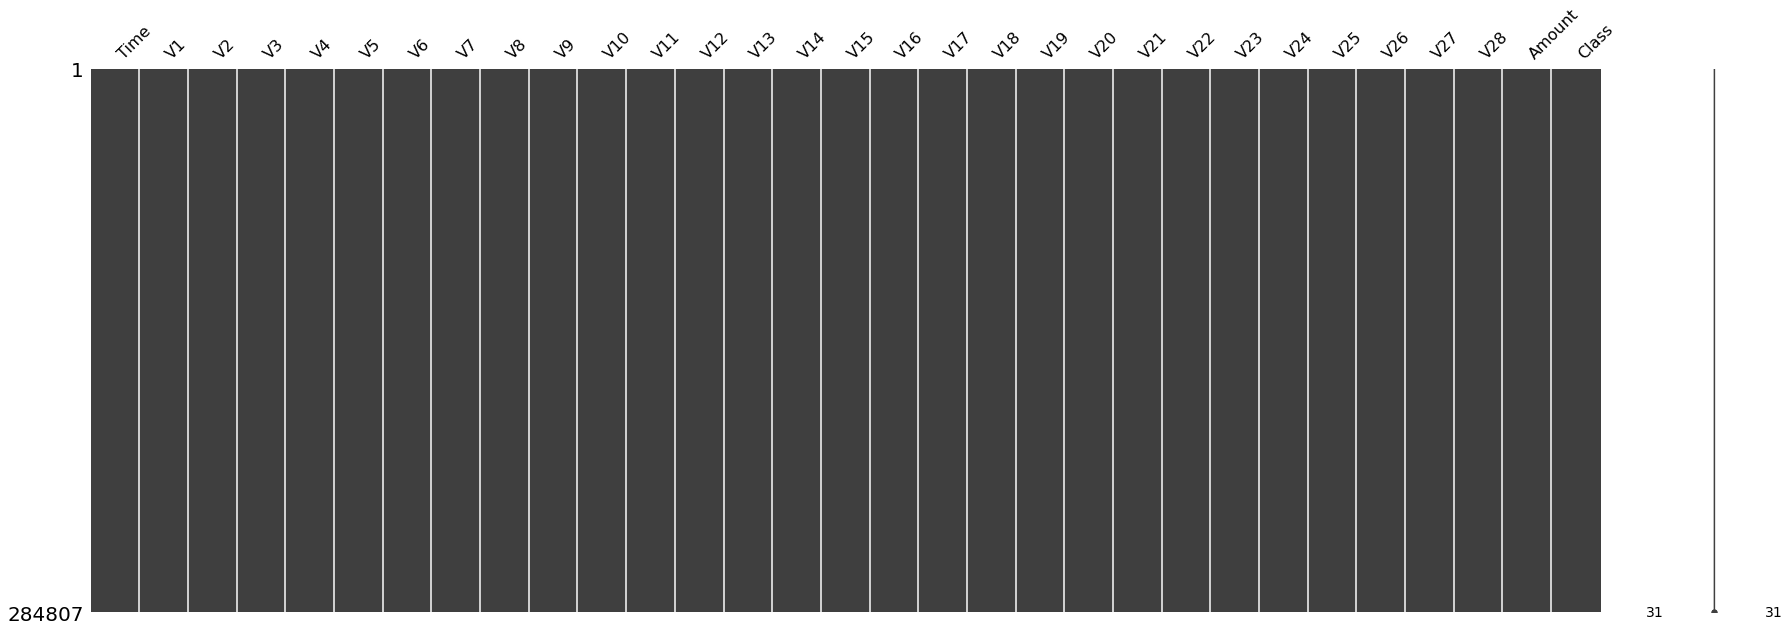

In [6]:
# Plot graphic of missing values
import missingno
missingno.matrix(data, figsize = (30,10));

In [7]:
data.isnull().sum().sort_values(ascending = False).head(5)

Time      0
V16       0
Amount    0
V28       0
V27       0
dtype: int64

Awesome, no missing values. Let's continue

<a id="t2."></a>
## 3. Exploration Data Analysis

In [8]:
# Visualization 
import matplotlib.pyplot as plt
import missingno
import seaborn as sns
plt.style.use('seaborn-whitegrid')
sns.set_palette("Set2")

### Target Feature: Class

Description: 1 for fraudulent transactions, 0 otherwise

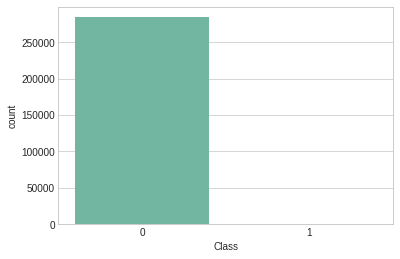

In [9]:
# Visualize the count of survivors
sns.countplot('Class', data=data);

In [10]:
from collections import Counter
Counter(data.Class)

Counter({0: 284315, 1: 492})

Class is a binary target with 492 instances of known fraud and 284,315 instances of non-fraud. Thats a ratio of:

In [11]:
print("Fraud to NonFraud Ratio of {:.3f}%".format(492/284315*100))

Fraud to NonFraud Ratio of 0.173%


Just from this we can see that there is a very low occurance of fraud in comparison with non fraud which could cause some issues should we dive into any kind of predictions. 

This dataset is unbalanced which means using the data as it is might result in unwanted behaviour from a supervised classifier. To make it easy to understand if a classifier were to train with this data set trying to achieve the best accuracy possible it would most likely label every transaction as a non-fraud.

To answer this problem we could use the oversampling principle or the undersampling principle The undersampling principle should be used only if we can be sure that the selected few tuples (in this case non-fraud) are representative of the whole non-fraud transactions of the dataset.

### Feature Exploration: Amount

Description: Transaction Amount

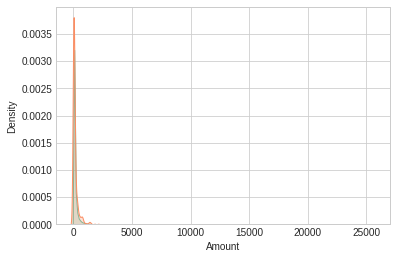

In [12]:
sns.kdeplot(data.Amount[data.Class == 0], label = 'Fraud', shade=True)
sns.kdeplot(data.Amount[data.Class == 1], label = 'NonFraud', shade=True)
plt.xlabel('Amount');

Looks like there a lot more instances of small fraud amounts than really large ones.

### Feature Exploration: Time

Description: Number of seconds elapsed between this transaction and the first transaction in the dataset

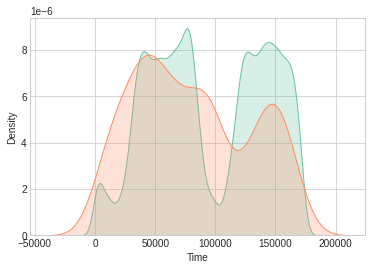

In [13]:
sns.kdeplot(data.Time[data.Class == 0], label = 'Fraud', shade=True)
sns.kdeplot(data.Time[data.Class == 1], label = 'NonFraud', shade=True)
plt.xlabel('Time');

We notice that the feature time doesn't seem to have an impact in the frequency of frauds.

### Correlation of features

In [14]:
data_corr = data.corr()

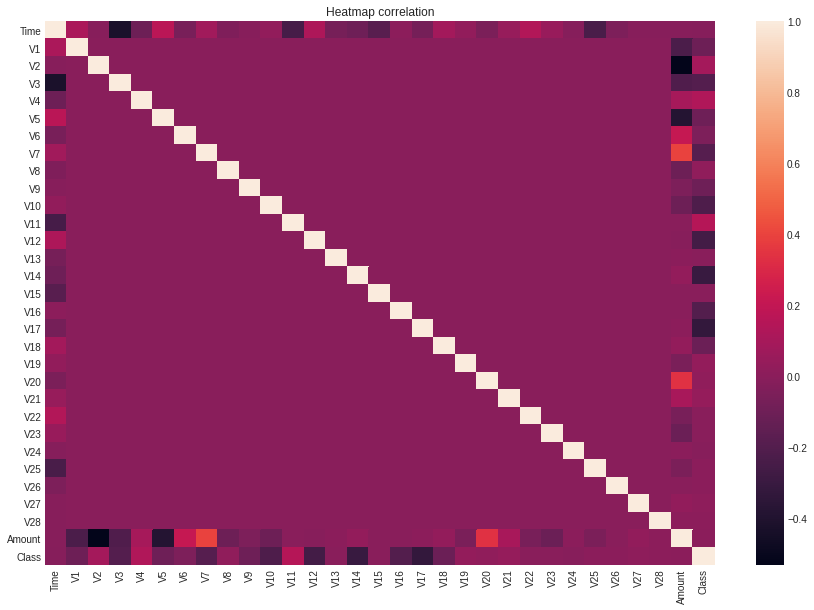

In [15]:
plt.figure(figsize=(15,10))
sns.heatmap(data_corr) # Displaying the Heatmap

plt.title('Heatmap correlation')
plt.show()

As we can notice, most of the features are not correlated with each other. 

What can generally be done on a massive dataset is a dimension reduction. By picking th emost important dimensions, there is a possiblity of explaining most of the problem, thus gaining a considerable amount of time while preventing the accuracy to drop too much.

However in this case given the fact that a PCA was previously performed, if the dimension reduction is effective then the PCA wasn't computed in the most effective way. Another way to put it is that no dimension reduction should be computed on a dataset on which a PCA was computed correctly.

<a id="t4."></a>
## 4. Feature Engineering

### Create arrays

In [16]:
# First, we will divide our data into two arrays; X and y

X = data.iloc[:, data.columns != 'Class']
y = data.iloc[:, data.columns == 'Class']
len(y[y.Class ==1]);

### Oversampling

One way to do oversampling is to replicate the under-represented class tuples until we attain a correct proportion between the class

However as we haven't infinite time nor the patience, we are going to run the classifier with the undersampled training data (for those using the undersampling principle if results are really bad just rerun the training dataset definition)

### Undersampling

Based in elimination of the Majority Type cases

In [17]:
# We count the number of fraud cases that exist
number_records_fraud = len (data[data.Class==1])
# And let's extract the indexes where there are cases of fraud and non-fraud
fraud_indices = np.array (data[data.Class==1].index)
normal_indices = np.array (data[data.Class==0].index)

In [18]:
# We randomly obtain a number of non-fraud indices, equal to the fraud index
random_normal_indices = np.random.choice (normal_indices, number_records_fraud, replace = False )
# We unite in a single array the fraud indexes with the randomly chosen non-fraud
under_sample_indices = np.concatenate ([fraud_indices, random_normal_indices])

In [19]:
# Now we choose the values of said indices
under_sample_data = data.iloc[under_sample_indices,:]
# We separate the X from the y again
X_undersample = under_sample_data.iloc [:, under_sample_data.columns != 'Class'];
y_undersample = under_sample_data.iloc [:, under_sample_data.columns == 'Class'];

### Train Test Split

In [20]:
from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split (X,y, test_size = 0.3, random_state = 0)
X_train_under, X_test_under, y_train_under, y_test_under = train_test_split (X_undersample,y_undersample, test_size = 0.3, random_state = 0)

<a id="t5."></a>
## 5. Model Selection

So now, we'll use a SVM model classifier, with the scikit-learn library.

In [21]:
classifier = svm.SVC(kernel='linear') # We set a SVM classifier, the default SVM Classifier (Kernel = Radial Basis Function)

NameError: name 'svm' is not defined

In [ ]:
classifier.fit(X_train, y_train) # Then we train our model, with our balanced data train.

<a id="t6."></a>
## 6. Testing the model

In [ ]:
prediction_SVM_all = classifier.predict(X_test_all) #And finally, we predict our data test.

In [ ]:
cm = confusion_matrix(y_test_all, prediction_SVM_all)
plot_confusion_matrix(cm,class_names)

<a id="t7."></a>
## 7. Presenting the Solution